In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Housing.csv') #reading our dataset

In [3]:
data.head() #gives the top 5 value of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
data.shape

(545, 13)

In [7]:
data.columns.tolist()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [8]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [14]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [27]:
(data.isnull().sum()/(len(data)))*100 #this confirms our data has no missing values

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

### creating a copy data for making changes witjout affecting original one

In [7]:
original_df=pd.DataFrame(data)

#creating a copy of it
copyData=original_df.copy()

In [39]:
copyData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### *performing EDA and summarising DATA*

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial phase in data analysis that involves both visual and statistical examination of datasets to uncover patterns, trends, and insights.

## Principal Goals of EDA
- Detect anomalies in the dataset.
- Develop recommendations for further investigation.
- Ensure a comprehensive understanding of the data's nuances.

## EDA Approaches
- **Summary Statistics**: Provides a high-level overview of the dataset.
- **Correlation Analysis**: Identifies relationships between variables.
- **Data Visualization**: Utilizes tools like box plots, scatter plots, and histograms to visually explore data.

## Benefits of EDA
- Enhances understanding of data distribution.
- Identifies variable correlations.
- Detects anomalies in the data.
- Assists in hypothesis creation and decision-making.

## Importance of EDA
EDA’s ability to identify trends and anomalies significantly boosts the effectiveness of data-driven projects by providing insightful information that aids in the creation of hypotheses and informed decision-making.


In [8]:
#droping out the features which are less significant
# ( hotwaterheating, guestroom)

copyData=copyData.drop(columns=['hotwaterheating', 'prefarea'])
copyData.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,yes,2,furnished


In [9]:
#mapping the values of columns having categorical values!!
#(mainroad, guestroom, bedrooms)

coltoMap=['basement', 'mainroad', 'guestroom', 'airconditioning']
maping={'yes':1, 'no':0}

for col in coltoMap:
    copyData[col]=copyData[col].map(maping)

copyData.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,furnished
1,12250000,8960,4,4,4,1,0,0,1,3,furnished
2,12250000,9960,3,2,2,1,0,1,0,2,semi-furnished
3,12215000,7500,4,2,2,1,0,1,1,3,furnished
4,11410000,7420,4,1,2,1,1,1,1,2,furnished


In [10]:
#doing label encoding, for [feature:furnishingstatus] 

copyData['furnishingstatus']=pd.Categorical(copyData['furnishingstatus']).codes
copyData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,2,1
3,12215000,7500,4,2,2,1,0,1,1,3,0
4,11410000,7420,4,1,2,1,1,1,1,2,0


In [47]:
copyData.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
mainroad,545.0,8.587156e-01,3.486347e-01,0.0,1.0,1.0,1.0,1.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.0,0.0,0.0,0.0,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.0,0.0,0.0,1.0,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.0,0.0,0.0,1.0,1.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [50]:
cat_col=copyData.select_dtypes(include=['object']).columns
num_col=copyData.select_dtypes(include=np.number).columns.tolist()
print("Cat columns")
print(cat_col) #will return no columns as we have already converted all column using maping
print("Num Columns")
print(num_col)

Cat columns
Index([], dtype='object')
Num Columns
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'parking', 'furnishingstatus']


price
Skew:  1.21


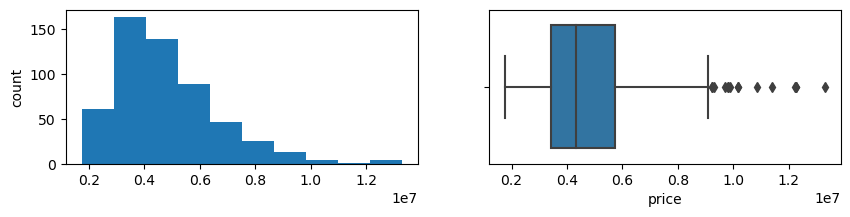

area
Skew:  1.32


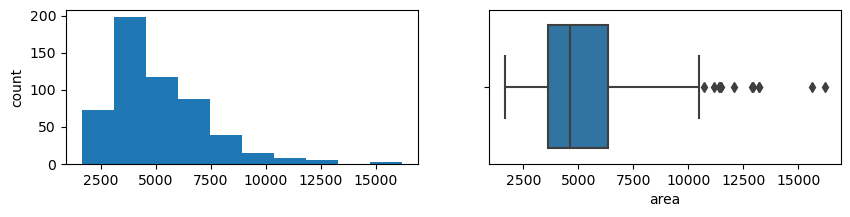

bedrooms
Skew:  0.5


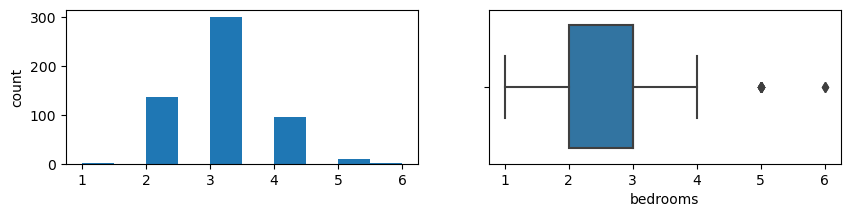

bathrooms
Skew:  1.59


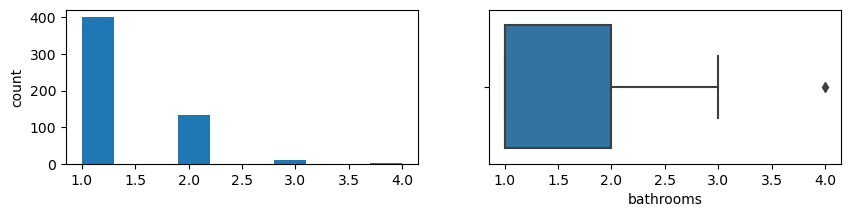

stories
Skew:  1.08


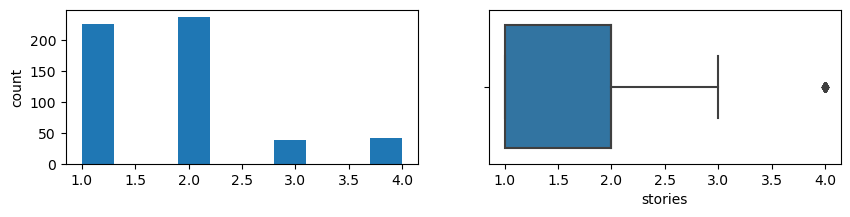

mainroad
Skew:  -2.07


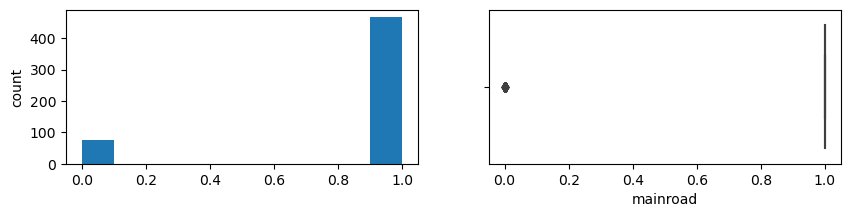

guestroom
Skew:  1.69


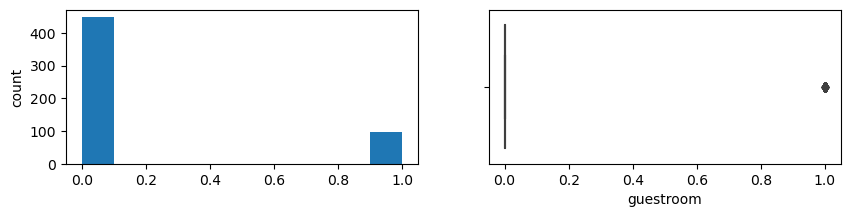

basement
Skew:  0.63


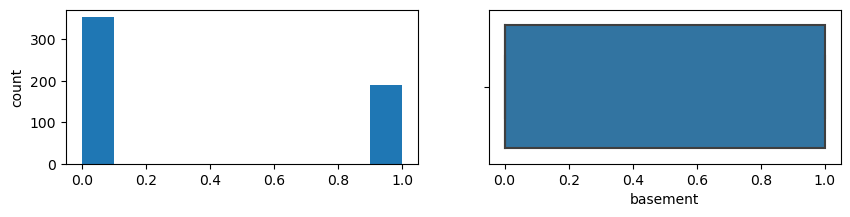

airconditioning
Skew:  0.8


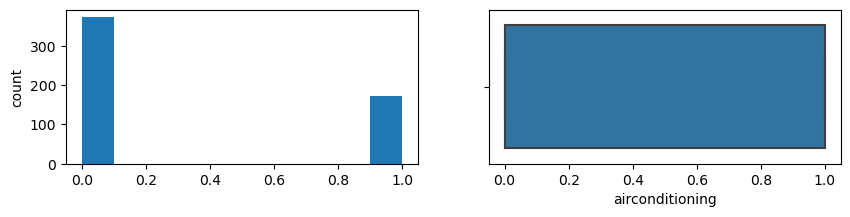

parking
Skew:  0.84


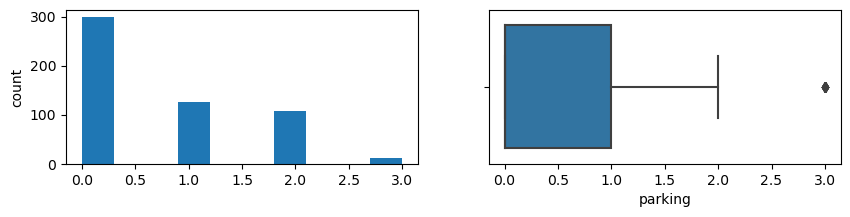

furnishingstatus
Skew:  -0.12


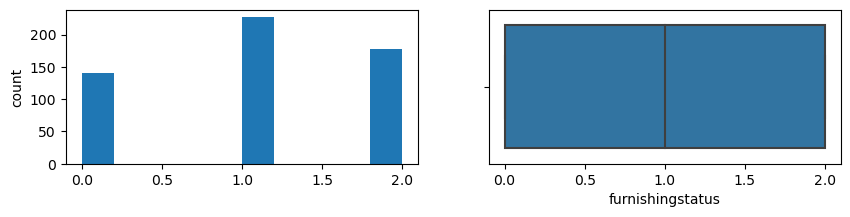

In [59]:
for col in num_col:
    print(col)
    print('Skew: ', round(copyData[col].skew(), 2))
    plt.figure(figsize = (10, 2))
    plt.subplot(1, 2, 1)
    copyData[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sn.boxplot(x=copyData[col])
    plt.show()

In [60]:
#handling the outliers using log transformation

#function for log tranformation

def log_transform(data, col):
    for colname in col:
        if (data[colname]==1.0).all():
            data[colname + '_log']=np.log(data[colname]+1)
        else:
            data[colname + '_log']=np.log(data[colname])
    data.info()

In [61]:
log_transform(copyData, ['mainroad', 'guestroom'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   airconditioning   545 non-null    int64  
 9   parking           545 non-null    int64  
 10  furnishingstatus  545 non-null    int8   
 11  mainroad_log      545 non-null    float64
 12  guestroom_log     545 non-null    float64
dtypes: float64(2), int64(10), int8(1)
memory usage: 51.8 KB


<Axes: xlabel='mainroad', ylabel='Count'>

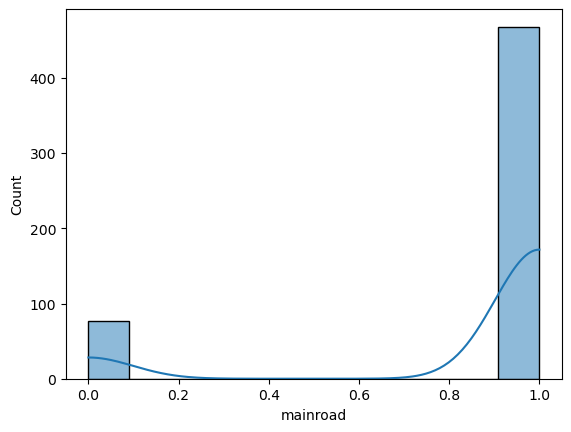

In [65]:
#log transformation plot of feature mainroad
sn.histplot(copyData['mainroad'], kde=True)

# Step 12: EDA Bivariate Analysis

Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

## Numerical Variables
- **Pair Plots**: Used to show the relationships between multiple numerical variables.
- **Scatter Plots**: Used to visualize the relationship between two numerical variables.

## Categorical Variables
- **Stacked Bar Chart**: 
  - Used when the output variable is a classifier.
  - Helps to visualize the distribution of categorical variables.
- **Bar Plots**: 
  - Used when the output variable is continuous.
  - Helps to compare the values of different categories.

## Example: Pair Plot for Categorical Variables

In our example, a pair plot has been used to show the relationship between two categorical variables.



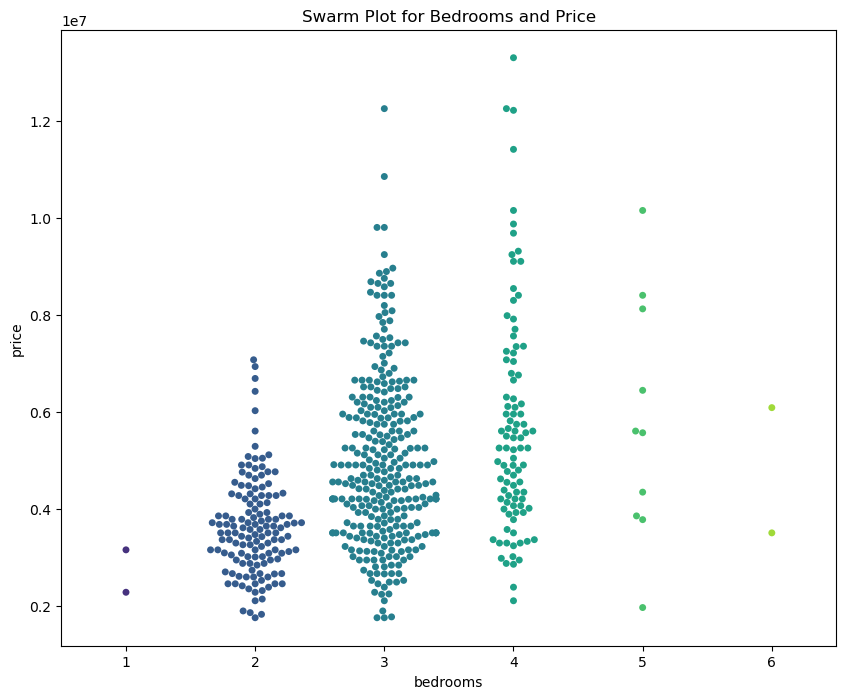

In [12]:
plt.figure(figsize=(10, 8))

sn.swarmplot(x="bedrooms", y="price", data=copyData, palette='viridis')

plt.title('Swarm Plot for Bedrooms and Price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

<Figure size 1000x600 with 0 Axes>

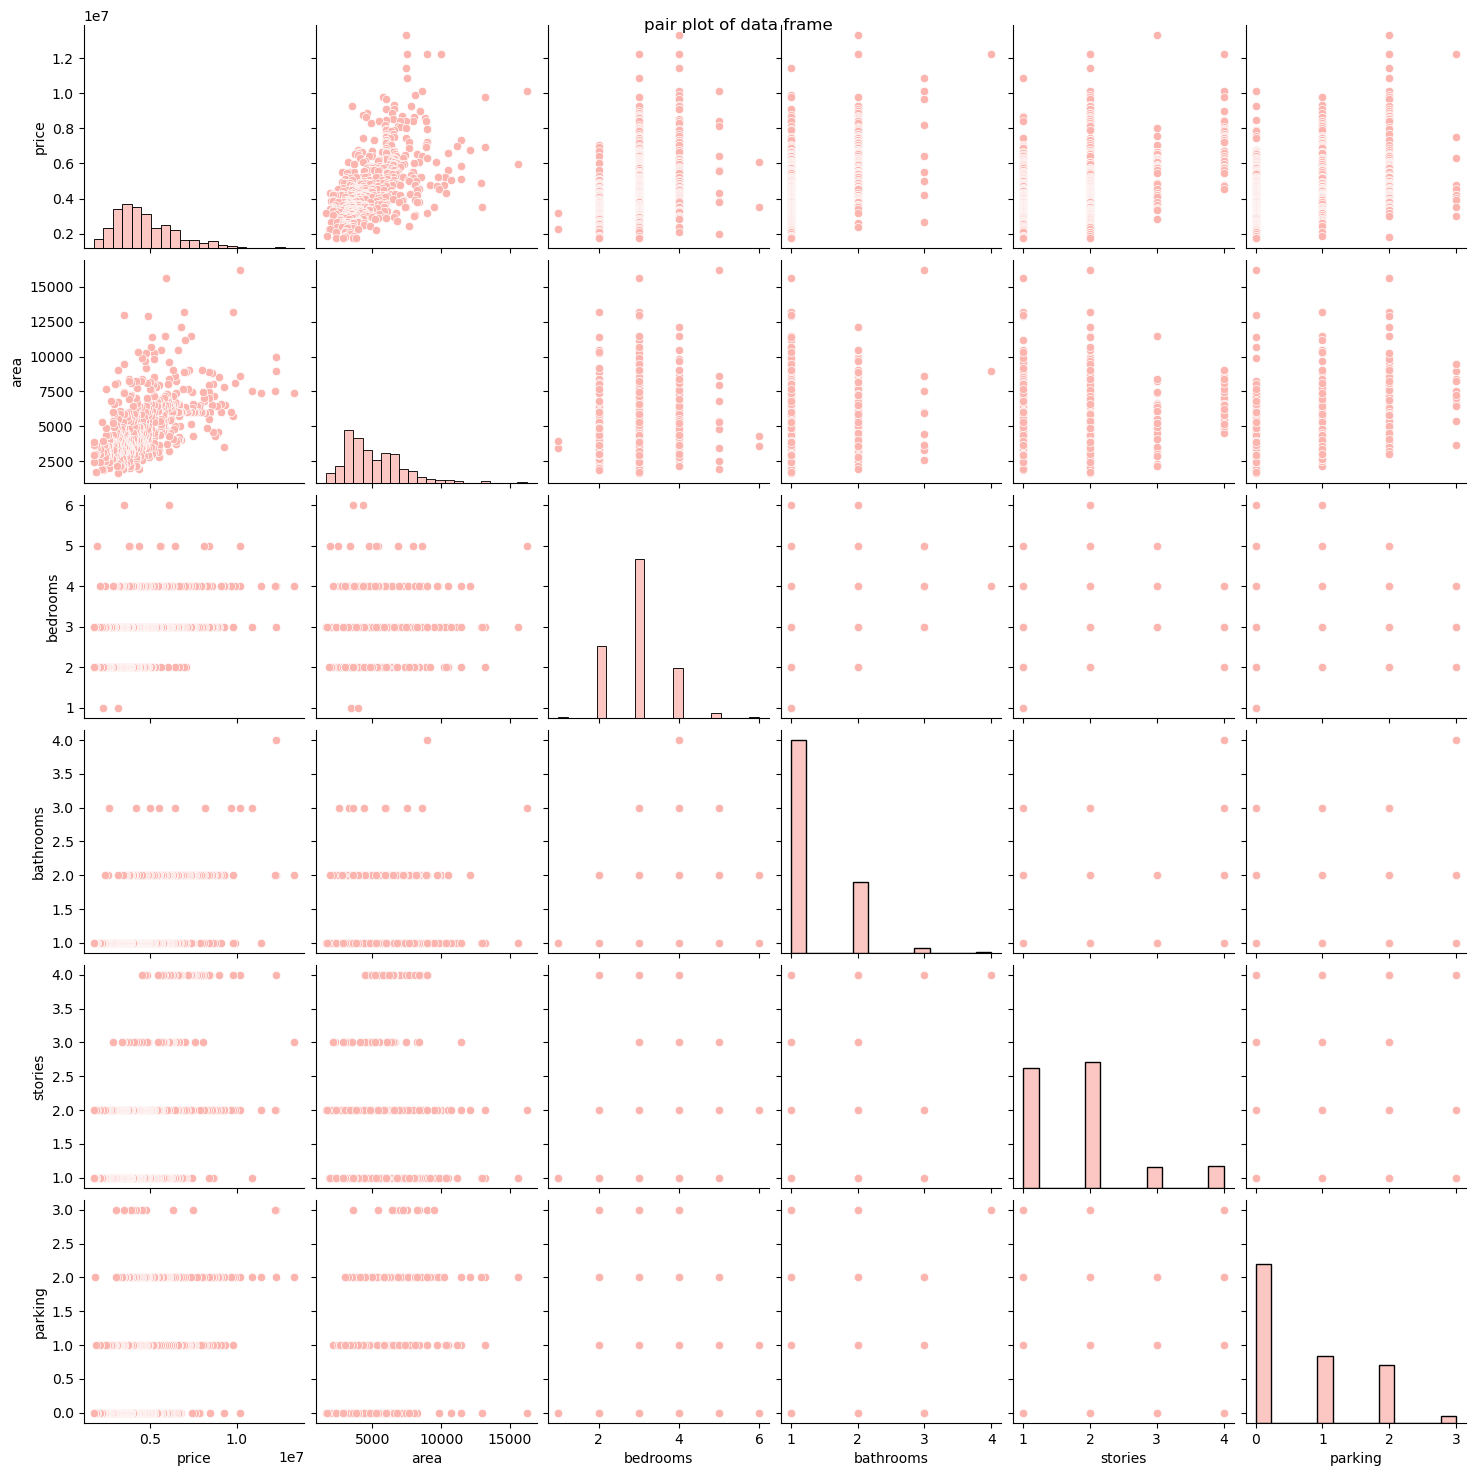

In [15]:
# performing bi-variate anaysis

sn.set_palette('Pastel1')
plt.figure(figsize=(10, 6))
sn.pairplot(copyData)

plt.suptitle("pair plot of data frame")
plt.show()

In [18]:
copyData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


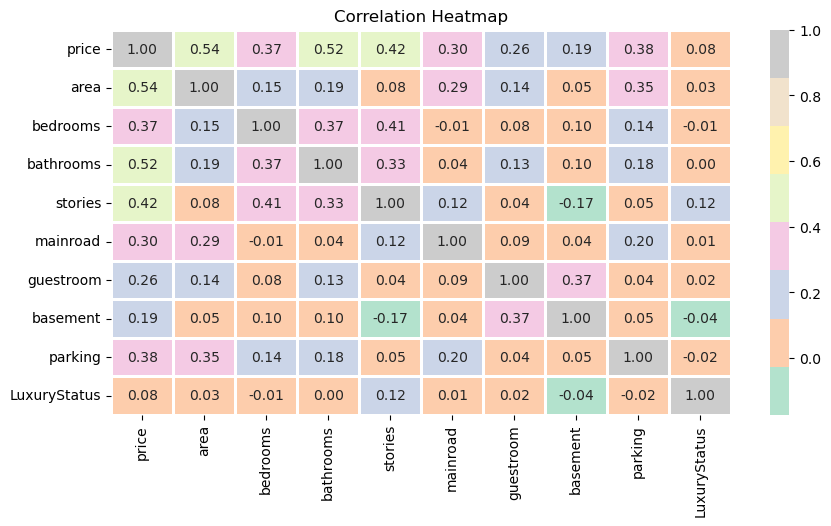

In [18]:
#multi-variate analysis

plt.figure(figsize=(10, 5))

# Using Seaborn to create a heatmap
sn.heatmap(copyData.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()


# Values close to +1 indicates strong positive correlation, -1 indicates a strong negative correlation and 0 indicates suggests no linear correlation.
# Darker colors signify strong correlation, while light colors represents weaker correlations.
# Positive correlation variable move in same directions. As one increases, the other also increases.
# Negative correlation variable move in opposite directions. An increase in one variable is associated with a decrease in the other

In [17]:
#creating a new column LuxuryStatus if airCondition-yes, furnihsingtstatus-2

copyData['LuxuryStatus']=copyData.apply(lambda row: 'yes' if row['airconditioning'] == 1 and row['furnishingstatus'] == 2 else 'no', axis=1)
copyData['LuxuryStatus']=copyData['LuxuryStatus'].map({'yes':1, 'no':0})
copyData=copyData.drop(columns=['furnishingstatus', 'airconditioning'])
copyData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,LuxuryStatus
0,13300000,7420,4,2,3,1,0,0,2,0
1,12250000,8960,4,4,4,1,0,0,3,0
2,12250000,9960,3,2,2,1,0,1,2,0
3,12215000,7500,4,2,2,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,2,0


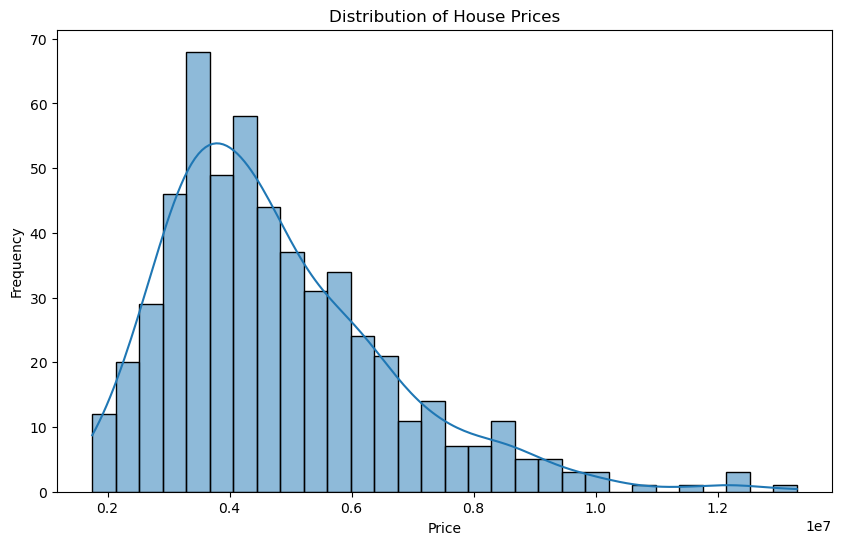

In [19]:
#chekcing for babygirl distributoin

plt.figure(figsize=(10, 6))
sn.histplot(copyData['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

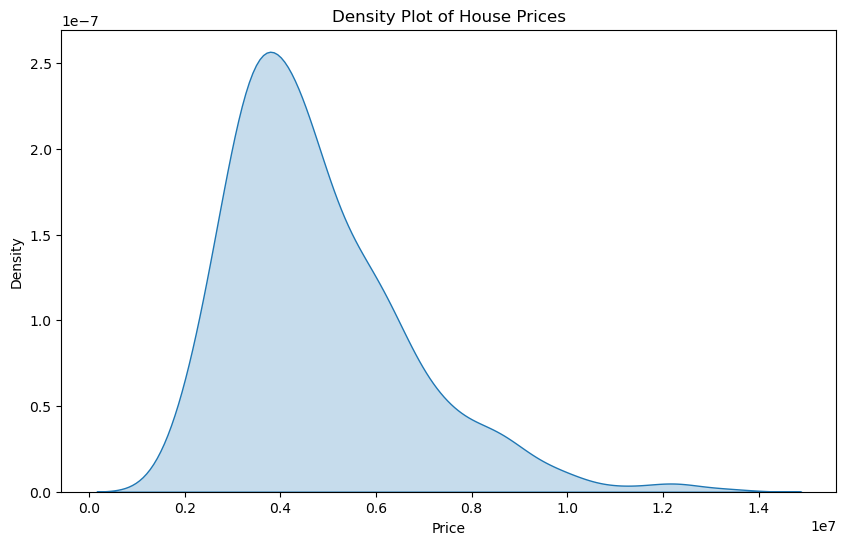

In [20]:
plt.figure(figsize=(10, 6))
sn.kdeplot(copyData['price'], shade=True)
plt.title('Density Plot of House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


## modelBuilding